In [1]:
!pip install matplotlib 
import pandas as pd
import numpy as np
# import matplotlib.pylot as plt
import seaborn as sns
# import scikitlearn
import datetime as datetime

Defaulting to user installation because normal site-packages is not writeable


In [17]:
df=pd.read_csv("bankfin.csv")

In [18]:
df.head()

,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.
0,409000611074',2017-06-29,TRF FROM Indiaforensic SERVICES,NaN,2017-06-29,NaN,1000000.0,1000000.0,.
1,409000611074',2017-07-05,TRF FROM Indiaforensic SERVICES,NaN,2017-07-05,NaN,1000000.0,2000000.0,.
2,409000611074',2017-07-18,FDRL/INTERNAL FUND TRANSFE,NaN,2017-07-18,NaN,500000.0,2500000.0,.
3,409000611074',2017-08-01,TRF FRM Indiaforensic SERVICES,NaN,2017-08-01,NaN,3000000.0,5500000.0,.
4,409000611074',2017-08-16,FDRL/INTERNAL FUND TRANSFE,NaN,2017-08-16,NaN,500000.0,6000000.0,.


In [19]:
df.shape

(2924, 9)

In [20]:
df.tail()

,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.
2919,409000425051',2017-06-29,KRISHI KALYAN CESS,NaN,2017-06-29,1.25,NaN,599200.35,.
2920,409000425051',2017-07-06,TRF TO Indiaforensic ONLINE SER,NaN,2017-07-06,100000.00,NaN,499200.35,.
2921,409000425051',2017-07-26,720717634445,NaN,2017-07-26,NaN,50000.0,549200.35,.
2922,409000425051',2018-04-07,IMPS 809712134438 FROM OX,NaN,2018-04-07,NaN,10000.0,559200.35,.
2923,409000425051',2018-07-12,TRF TO Indiaforensic SERVICES I,NaN,2018-07-12,100000.00,NaN,459200.35,.


In [21]:
df.describe()

,CHQ.NO.,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT
count,9.000000,1.373000e+03,1.551000e+03,2.924000e+03
mean,5.000000,1.787891e+05,1.585665e+05,1.204538e+06
std,2.738613,2.306569e+05,2.119880e+05,7.820155e+05
min,1.000000,1.250000e+00,9.000000e-01,1.383550e+05
25%,3.000000,2.000000e+04,5.000000e+03,8.214793e+05
50%,5.000000,1.119625e+05,2.100000e+04,1.087997e+06
75%,7.000000,2.343199e+05,3.000000e+05,1.383210e+06
max,9.000000,2.500000e+06,3.000000e+06,8.500000e+06


In [22]:
df.info


<bound method DataFrame.info of          Account No        DATE               TRANSACTION DETAILS  CHQ.NO.  \
0     409000611074'  2017-06-29  TRF FROM  Indiaforensic SERVICES      NaN   
1     409000611074'  2017-07-05  TRF FROM  Indiaforensic SERVICES      NaN   
2     409000611074'  2017-07-18        FDRL/INTERNAL FUND TRANSFE      NaN   
3     409000611074'  2017-08-01   TRF FRM  Indiaforensic SERVICES      NaN   
4     409000611074'  2017-08-16        FDRL/INTERNAL FUND TRANSFE      NaN   
...             ...         ...                               ...      ...   
2919  409000425051'  2017-06-29                KRISHI KALYAN CESS      NaN   
2920  409000425051'  2017-07-06  TRF TO  Indiaforensic ONLINE SER      NaN   
2921  409000425051'  2017-07-26                      720717634445      NaN   
2922  409000425051'  2018-04-07         IMPS 809712134438 FROM OX      NaN   
2923  409000425051'  2018-07-12  TRF TO  Indiaforensic SERVICES I      NaN   

      VALUE DATE  WITHDRAWAL AM

In [23]:
df.isnull().sum()

Account No                0
DATE                      0
TRANSACTION DETAILS       0
CHQ.NO.                2915
VALUE DATE                0
WITHDRAWAL AMT         1551
DEPOSIT AMT            1373
BALANCE AMT               0
.                         0
dtype: int64

In [34]:
# Distribution of transaction types
transaction_types = df['TRANSACTION DETAILS'].value_counts()
print(transaction_types)


TRANSACTION DETAILS
FDRL/INTERNAL FUND TRANSFE          573
TRF TO  Indiaforensic SERVICES I     37
TRF FROM  Indiaforensic SERVICES     24
TRF FRM  Indiaforensic SERVICES      20
Indiaforensic SERVICES INDIA PVT      5
                                   ... 
BBPS SETMNT FOR DT 101120             1
BBPS SETMNT FOR DT 091120             1
BBPS SETMNT FOR DT 081120             1
BBPS SETMNT FOR DT 071120             1
IMPS 809712134438 FROM OX             1
Name: count, Length: 2039, dtype: int64


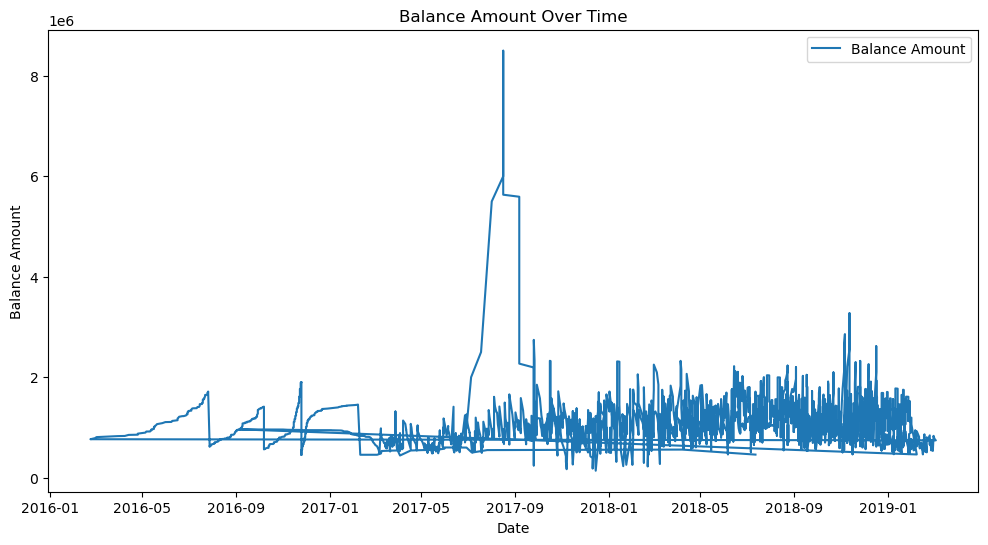

In [36]:
# Plotting the balance amount over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['BALANCE AMT'], label='Balance Amount')
plt.xlabel('Date')
plt.ylabel('Balance Amount')
plt.title('Balance Amount Over Time')
plt.legend()
plt.show()


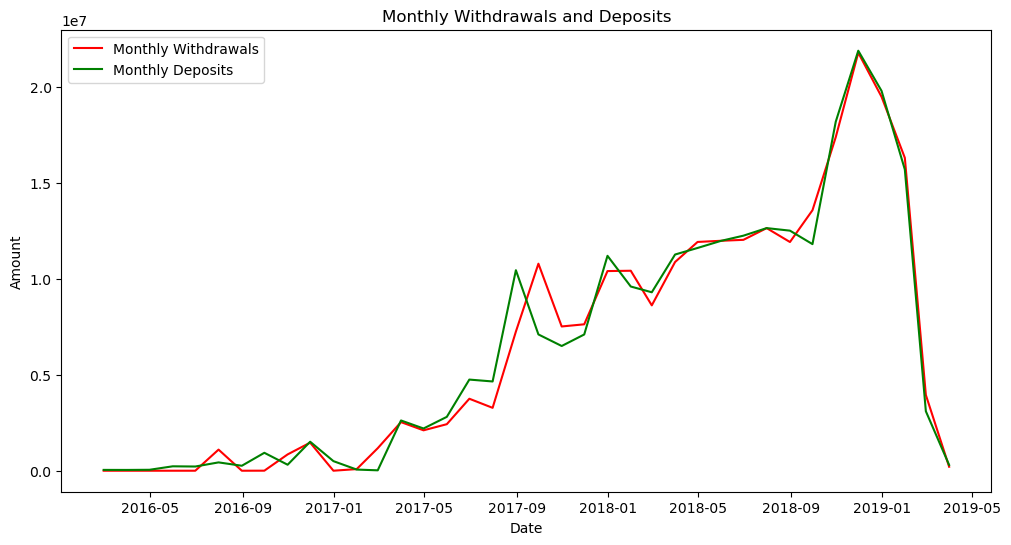

In [38]:
# Resample data to get monthly withdrawals and deposits
monthly_withdrawals = df['WITHDRAWAL AMT'].resample('M').sum()
monthly_deposits = df['DEPOSIT AMT'].resample('M').sum()

# Plot monthly withdrawals and deposits
plt.figure(figsize=(12, 6))
plt.plot(monthly_withdrawals.index, monthly_withdrawals, label='Monthly Withdrawals', color='red')
plt.plot(monthly_deposits.index, monthly_deposits, label='Monthly Deposits', color='green')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Monthly Withdrawals and Deposits')
plt.legend()
plt.show()


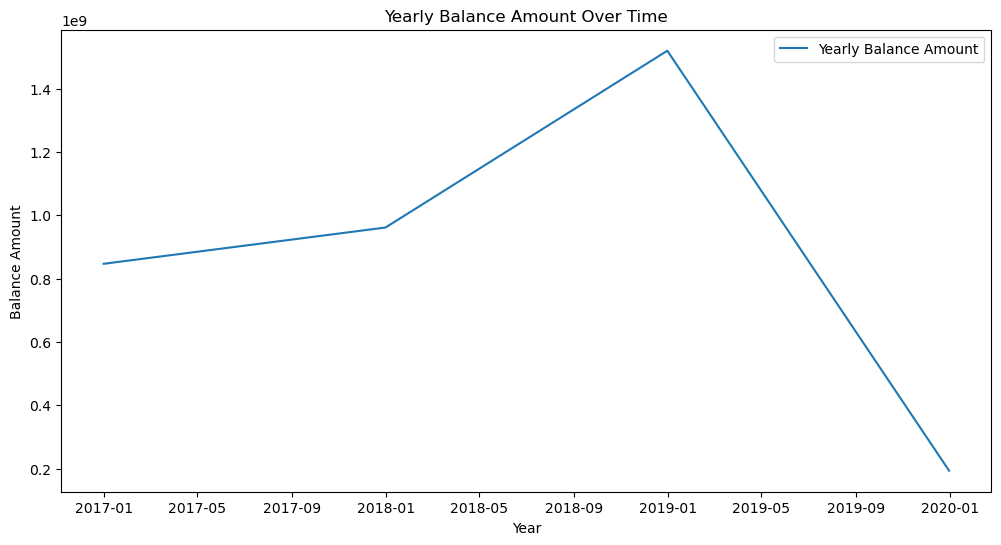

In [40]:
# Group data by year to analyze yearly trends
yearly_data = df.resample('Y').sum()

# Plot yearly balance amounts
plt.figure(figsize=(12, 6))
plt.plot(yearly_data.index, yearly_data['BALANCE AMT'], label='Yearly Balance Amount')
plt.xlabel('Year')
plt.ylabel('Balance Amount')
plt.title('Yearly Balance Amount Over Time')
plt.legend()
plt.show()


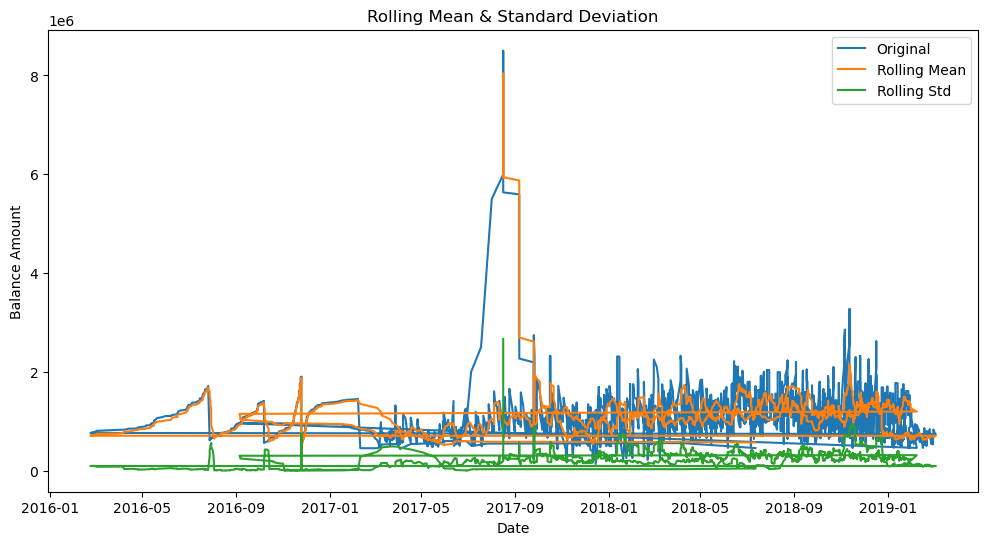

In [42]:
# Calculate rolling mean and standard deviation
rolling_mean = df['BALANCE AMT'].rolling(window=12).mean()
rolling_std = df['BALANCE AMT'].rolling(window=12).std()

# Plot rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(df['BALANCE AMT'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.xlabel('Date')
plt.ylabel('Balance Amount')
plt.title('Rolling Mean & Standard Deviation')
plt.legend()
plt.show()


In [44]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


ValueError: could not convert string to float: "409000611074'"

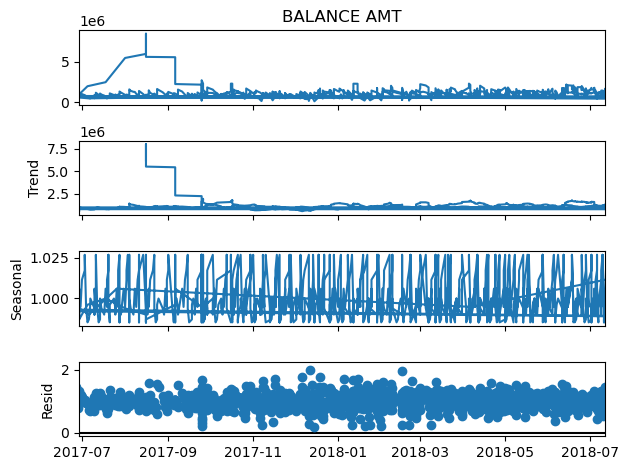

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(df['BALANCE AMT'], model='multiplicative', period=12)

# Plot the decomposition
result.plot()
plt.show()


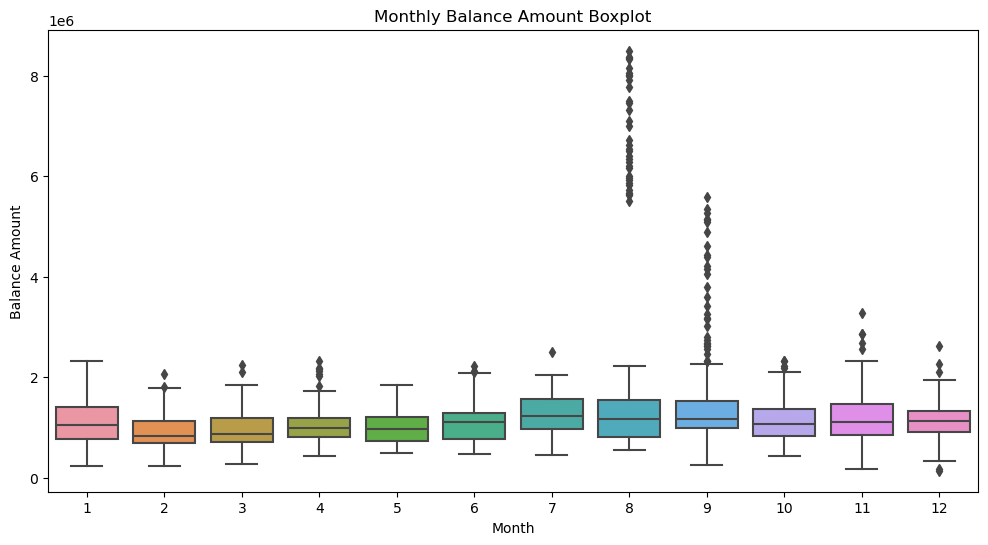

In [48]:
# Extract month and year from the index
df['Year'] = df.index.year
df['Month'] = df.index.month

# Plot boxplot for monthly data
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='BALANCE AMT', data=df)
plt.xlabel('Month')
plt.ylabel('Balance Amount')
plt.title('Monthly Balance Amount Boxplot')
plt.show()


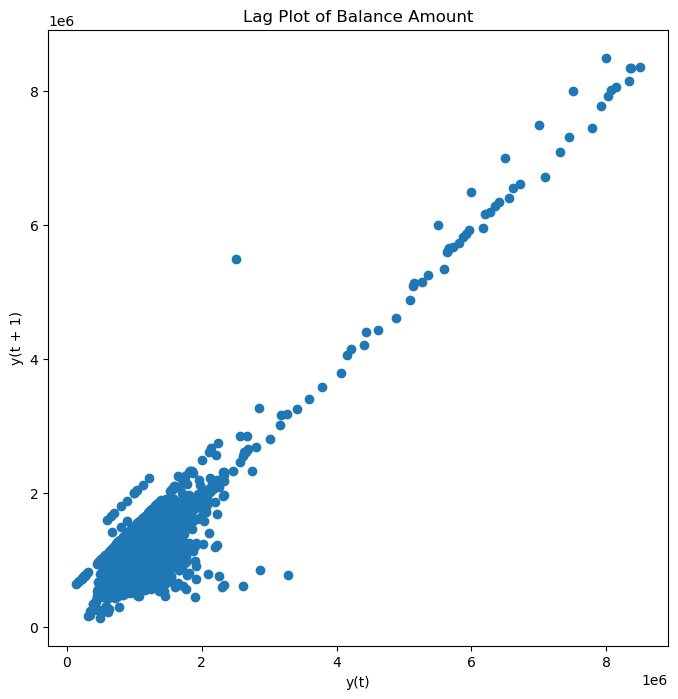

In [46]:
from pandas.plotting import lag_plot

# Lag plot to check for autocorrelation
plt.figure(figsize=(8, 8))
lag_plot(df['BALANCE AMT'])
plt.title('Lag Plot of Balance Amount')
plt.show()


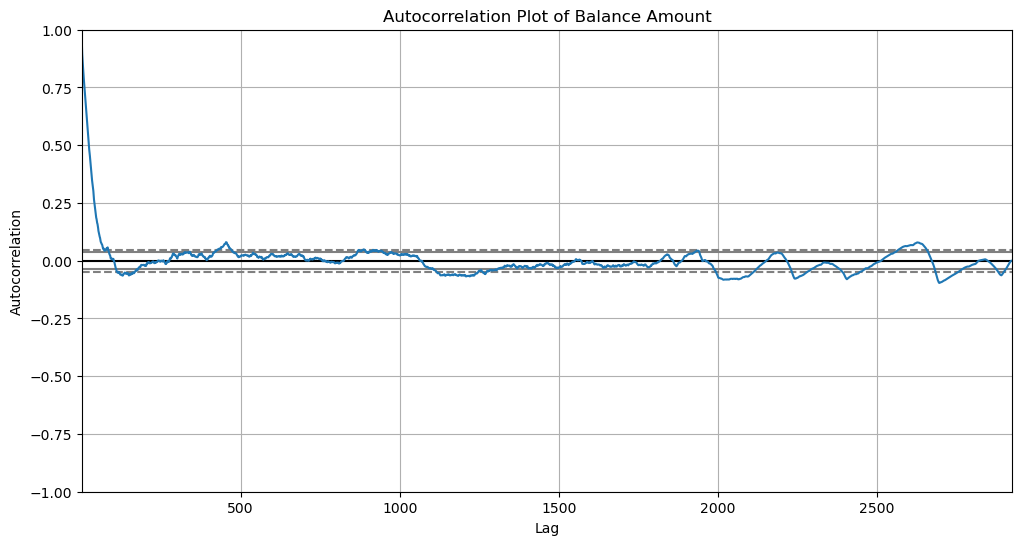

In [52]:
from pandas.plotting import autocorrelation_plot

# Autocorrelation plot
plt.figure(figsize=(12, 6))
autocorrelation_plot(df['BALANCE AMT'])
plt.title('Autocorrelation Plot of Balance Amount')
plt.show()


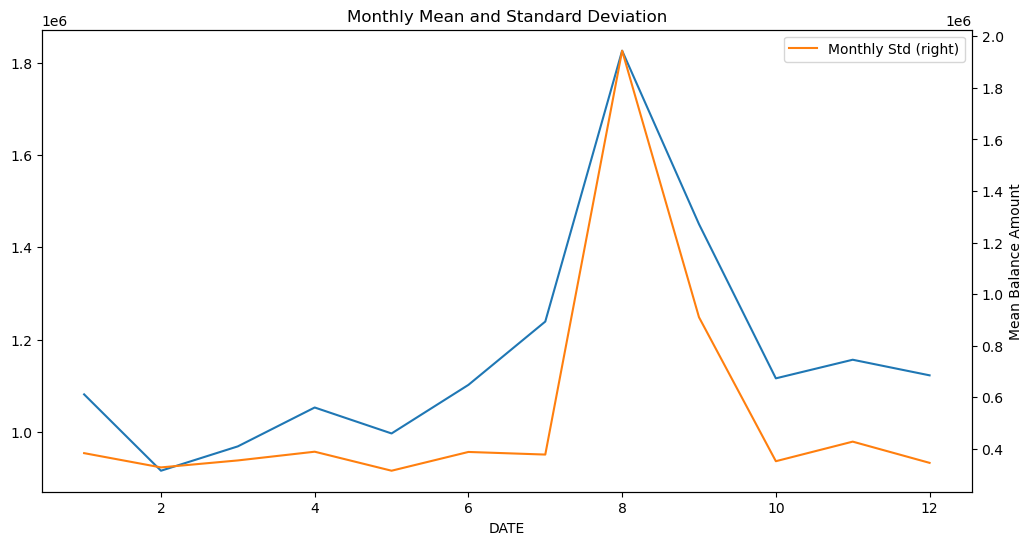

In [54]:
# Group by month to calculate mean and standard deviation
monthly_stats = df.groupby(df.index.month)['BALANCE AMT'].agg(['mean', 'std'])

# Plot monthly mean and standard deviation
plt.figure(figsize=(12, 6))
monthly_stats['mean'].plot(label='Monthly Mean')
monthly_stats['std'].plot(label='Monthly Std', secondary_y=True)
plt.title('Monthly Mean and Standard Deviation')
plt.xlabel('Month')
plt.ylabel('Mean Balance Amount')
plt.legend()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


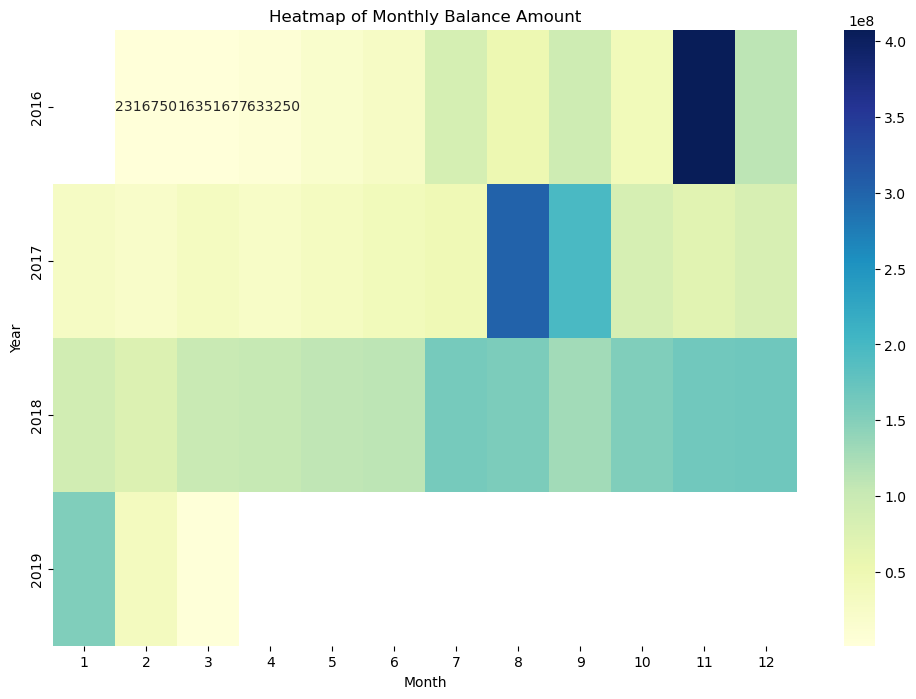

In [56]:
# Pivot data to create heatmap for withdrawals and deposits
heatmap_data = df.pivot_table(values='BALANCE AMT', index=df.index.year, columns=df.index.month, aggfunc='sum')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Heatmap of Monthly Balance Amount')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


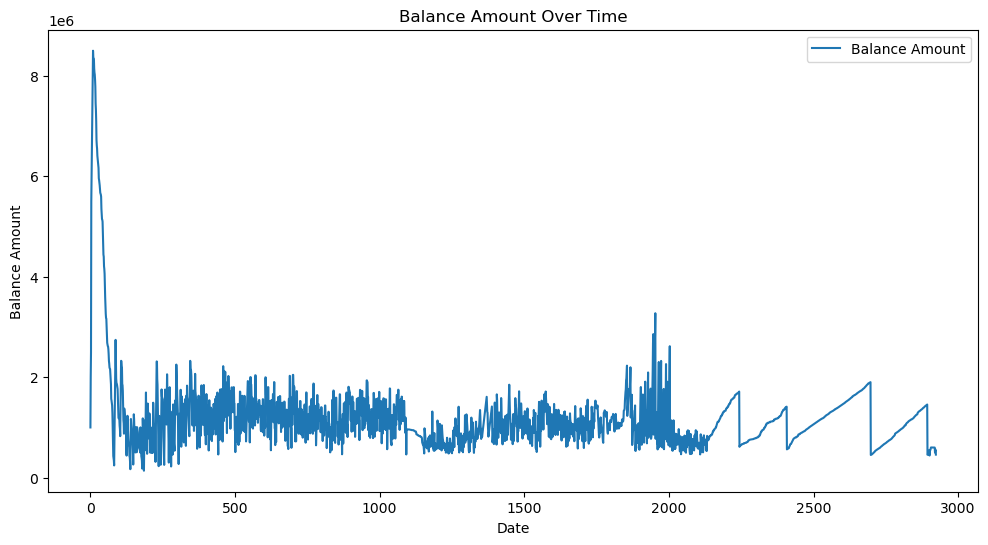

In [24]:
# Plotting the balance amount over time
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['BALANCE AMT'], label='Balance Amount')
plt.xlabel('Date')
plt.ylabel('Balance Amount')
plt.title('Balance Amount Over Time')
plt.legend()
plt.show()


In [26]:
# Drop empty columns
df.dropna(axis=1, how='all', inplace=True)

# Keep only the first 5150 records
df = df.iloc[:5150]

# Convert 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Set 'DATE' as index
df.set_index('DATE', inplace=True)

# Display the first few rows after preprocessing
df.head()

# Resample the data to get monthly sums
monthly_data = df.resample('M').sum()

# Display the first few rows of the monthly data
monthly_data.head()


,Account No,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.
DATE,,,,,,,,
2016-02-29,409000425051'409000425051'409000425051',NEFT/SBIN316054519453/MrNEFT/SBIN316054795331/...,0.0,2016-02-232016-02-232016-02-29,0.0,43000.00,2316749.96,...
2016-03-31,409000425051'409000425051',NEFT/SBIN116062424445/DEENEFT/MAHBH16090571628...,0.0,2016-03-022016-03-30,0.0,41000.00,1635166.64,..
2016-04-30,409000425051'409000425051'409000425051'4090004...,NEFT/SD1290309312/VIDYARTNEFT/BARBH16098696964...,0.0,2016-04-062016-04-072016-04-082016-04-132016-0...,0.0,49000.00,7633249.88,.........
2016-05-31,409000425051'409000425051'409000425051'4090004...,NEFT/BKIDN16126554823/NASNEFT/SBIN216127966232...,0.0,2016-05-052016-05-062016-05-112016-05-122016-0...,0.0,229994.28,17767402.52,..................
2016-06-30,409000425051'409000425051'409000425051'4090004...,NEFT/SBIN616159262965/deeNEFT/SBIN616160853986...,0.0,2016-06-072016-06-082016-06-082016-06-092016-0...,0.0,219000.00,27903284.80,.......................


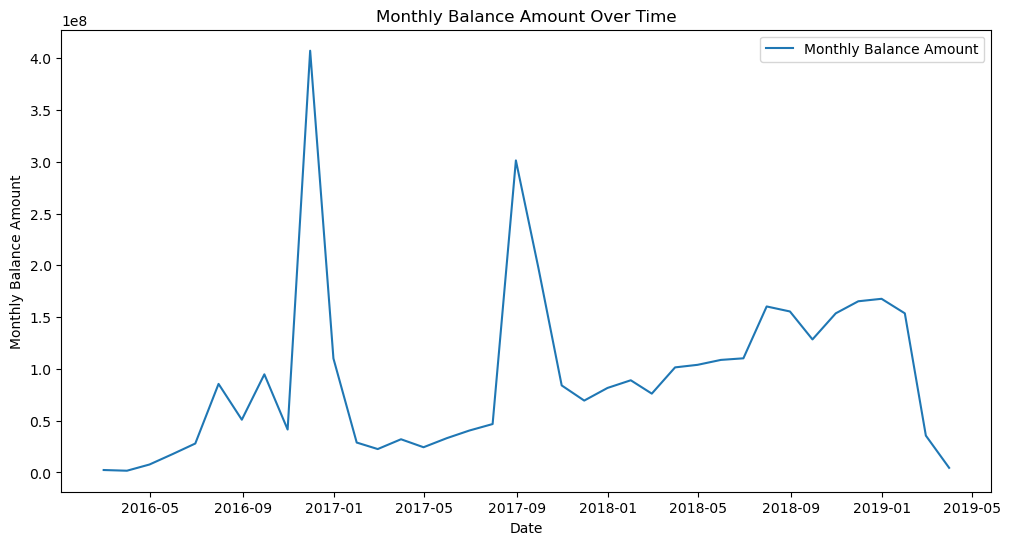

In [28]:
# Plotting the monthly balance amount over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['BALANCE AMT'], label='Monthly Balance Amount')
plt.xlabel('Date')
plt.ylabel('Monthly Balance Amount')
plt.title('Monthly Balance Amount Over Time')
plt.legend()
plt.show()


In [30]:
# Create a time series model using Holt-Winters Exponential Smoothing
model = ExponentialSmoothing(monthly_data['BALANCE AMT'], trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()

# Display the model summary
fit.summary()


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,BALANCE AMT,No. Observations:,38
Model:,ExponentialSmoothing,SSE,158893815629334816.000
Optimized:,True,AIC,1398.838
Trend:,Additive,BIC,1425.040
Seasonal:,Additive,AICC,1434.838
Seasonal Periods:,12,Date:,"Mon, 24 Jun 2024"
Box-Cox:,False,Time:,20:09:08
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0757143,alpha,True
smoothing_trend,0.0757143,beta,True


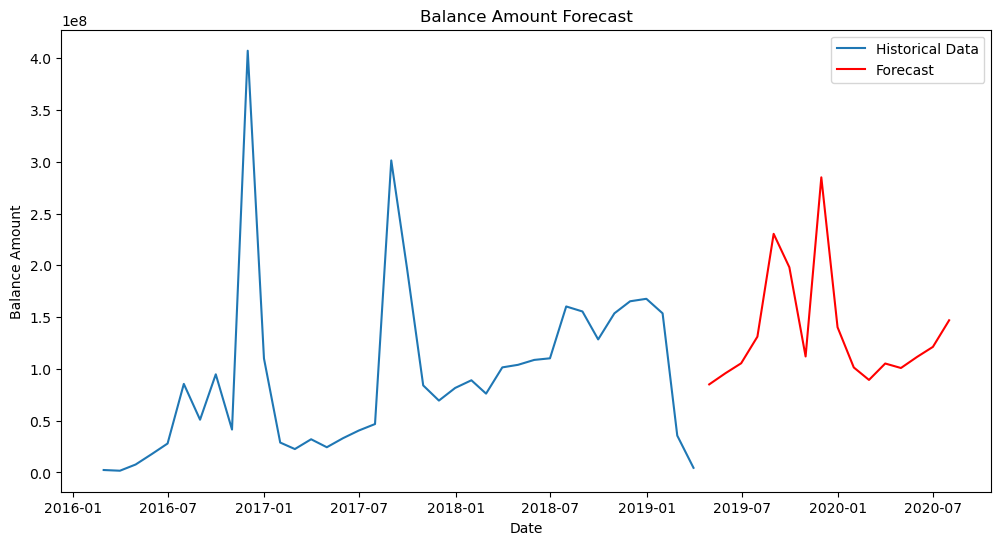

In [32]:
# Forecast the next 12 months
forecast = fit.forecast(steps=16)

# Plot the historical data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['BALANCE AMT'], label='Historical Data')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Balance Amount')
plt.title('Balance Amount Forecast')
plt.legend()
plt.show()


In [13]:
import pandas as pd
import numpy as np
from datetime import datetime
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'bankfin.csv'
df = pd.read_csv(file_path)

# Drop empty columns
df.dropna(axis=1, how='all', inplace=True)

# Keep only the first 5150 records
df = df.iloc[:5150]

# Convert 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Set 'DATE' as index
df.set_index('DATE', inplace=True)

# Resample the data to get monthly sums
monthly_data = df.resample('M').sum()

# Create a time series model using Holt-Winters Exponential Smoothing
model = ExponentialSmoothing(monthly_data['BALANCE AMT'], trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()

# Function to predict balance amount and check for cash crunch
def predict_cash_crunch(month_year, required_amount):
    # Convert input to datetime
    date = datetime.strptime(month_year, "%m/%Y")
    
    # Calculate the number of steps to forecast
    steps = (date.year - monthly_data.index[-1].year) * 12 + (date.month - monthly_data.index[-1].month)
    
    if steps <= 0:
        print("Date must be in the future.")
        return
    
    # Predict the balance amount for the given month
    forecast = fit.forecast(steps=steps)
    
    # Get the predicted balance amount for the given month
    predicted_balance = forecast.iloc[-1]
    
    # Determine if there will be a cash crunch
    if predicted_balance >= required_amount:
        print(f"There is no cash crunch in {month_year}.")
        print(f"Predicted balance amount: {predicted_balance:.2f}")
    else:
        print(f"There is a cash crunch in {month_year}.")
        print(f"Predicted balance amount: {predicted_balance:.2f}")

# User input
month_year = input("Enter the month and year (MM/YYYY): ")
required_amount = float(input("Enter the required amount: "))

# Predict and check for cash crunch
predict_cash_crunch(month_year, required_amount)


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Enter the month and year (MM/YYYY):  08/2026
Enter the required amount:  5000000


There is no cash crunch in 08/2026.
Predicted balance amount: 341090769.19
